# Introduction

The given dataset contains the metadata of the books from **bookdepository.com**. The detailed information of the attributes is provided below.

- **authors** : list of authors
- bestseller-rank : Bestseller ranking
- categories : List of all categories (genres)
- description : Description(string)
- dimension-x : Dimension along x axis (float in cms)
- dimension-y : Dimension along y axis (float in cms)
- dimension-z : Dimension along z axis (float in cms)
- edition : Edition (string)
- edition-statement : Edition statement (string)
- for-ages : Ranges of ages 
- format : Format 
- id : Unique Identifier
- illustration-note
- image-checksum : Cover Image checksum
- image-path : Cover image file path
- image-url : Cover image url
- imprint
- index-date : Crawling date 
- isbn10 : ISBN-10
- isbn13 : ISBN-13 
- lang : List of languages of book
- publication-date : Publication date
- publication-place : Publication place
- rating-avg : Rating average (0-5)
- rating-count : Number of ratings 
- title : Book's title 
- url : Relative URL (https://bookdepository.com + url)
- weight : Weight of book in KG

# Preprocessing and EDA

In [2]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ast
import plotly.express as px
from wordcloud import WordCloud
import itertools
from itertools import combinations
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

df0 = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/dataset.csv')
df0_a = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/authors.csv')
df0_c = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/categories.csv')
df0_p = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/places.csv')
df0_f = pd.read_csv('/Users/maulikthakkar/DM_CP2/dataset/formats.csv')


In [3]:

df0.rename(columns={'id' : 'book_id'} , inplace=True)
df0.columns

Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'book_id',
       'illustrations-note', 'image-checksum', 'image-path', 'image-url',
       'imprint', 'index-date', 'isbn10', 'isbn13', 'lang', 'publication-date',
       'publication-place', 'rating-avg', 'rating-count', 'title', 'url',
       'weight'],
      dtype='object')

In [4]:
df0_a.head()

,author_id,author_name
0,9561,NaN
1,451324,# House Press
2,454250,# Petal Press
3,249724,#GARCIA MIGUELE
4,287710,#Worldlcass Media


In [5]:
df0_f.head()

,format_id,format_name
0,21,Address
1,5,Audio
2,27,Bath
3,44,Big
4,14,Board


In [6]:
df0_c.head()

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [7]:
df0_p.head()

,place_id,place_name


In [8]:
df0.isnull().sum()

authors                     0
bestsellers-rank       466842
categories                  0
description             80087
dimension-x             48227
dimension-y             93531
dimension-z             48227
edition                926569
edition-statement      749037
for-ages              1033390
format                   6622
book_id                     0
illustrations-note     753737
image-checksum             27
image-path                 27
image-url                  27
imprint                830049
index-date            1109383
isbn10                      0
isbn13                      0
lang                    60407
publication-date         2603
publication-place     1109383
rating-avg             440130
rating-count           440130
title                       0
url                         0
weight                  87173
dtype: int64

In [9]:
df0.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
book_id                 int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

Here categories are given as string representation. So we have to convert it into list of integeres.

In [10]:

df = df0[[ 'book_id','categories' , 'description' , 'title']];
# Coverting string representation to list of integeres
df.loc[:, 'categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))

In [11]:
df_merged = df.explode('categories').merge(df0_c , left_on='categories' , right_on='category_id' , how='left')

**We can do qualitative analysis of Number of books belonging to categories using word cloud.**

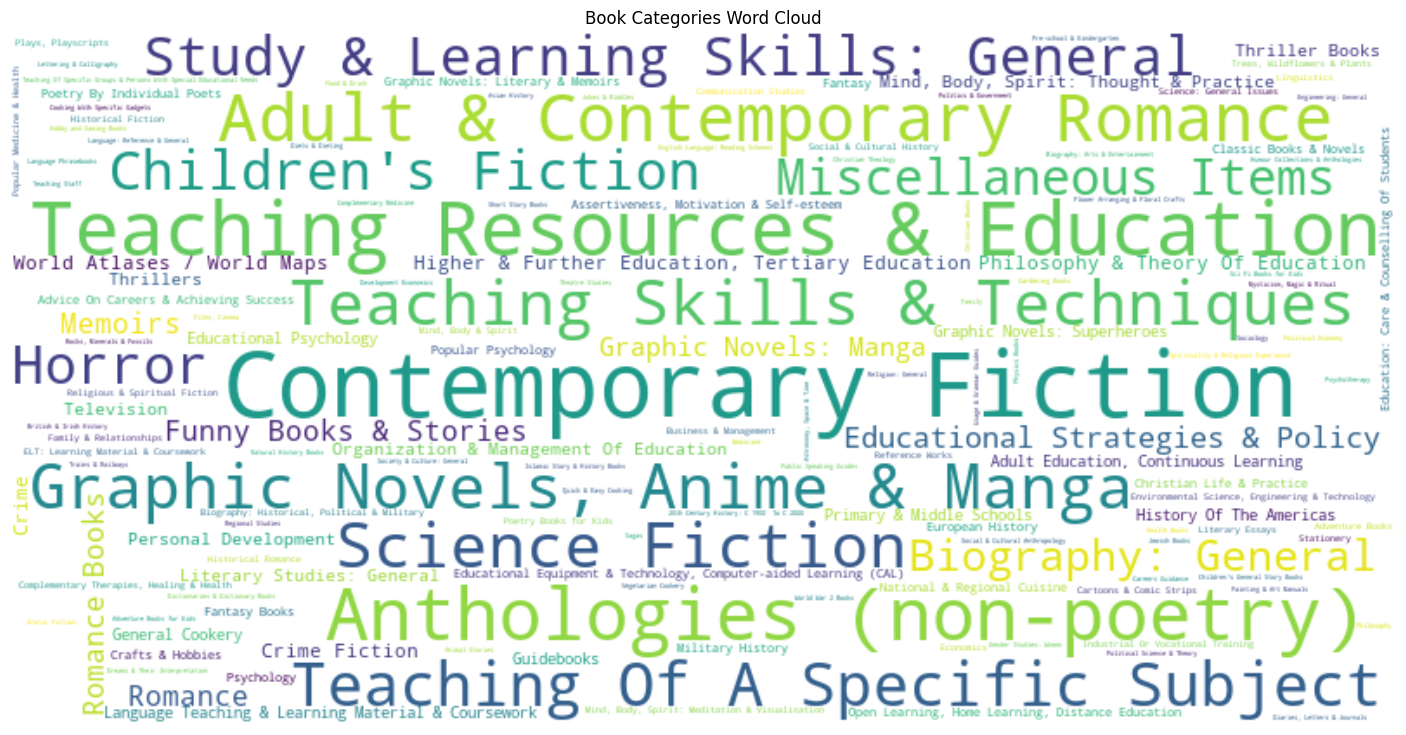

In [12]:
category_counts = df_merged['category_name'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Book Categories Word Cloud')
plt.show()

Here we can observe that there are higher number of books belonging to following categories.
- Contemporary Fiction
- Teaching Resources & Education
- Children Fiction
- Horror
- Science Fiction
- Graphic Novels ,Anime & Manga
- Anthologies (non - poetry)
- Study & Learning Skills : General

For detailed visualization , we can use other technique like treemap.

In [13]:
category_counts = df_merged['category_name'].value_counts().reset_index()
category_counts.columns = ['Category Name', 'Number of Books']
# Create a treemap using Plotly Express
fig = px.treemap(category_counts, path=['Category Name'], values='Number of Books', labels={'Category Name': 'Category', 'Number of Books': 'Count'})
fig.show()

- Now let's explore relations between  format , weight and dimensions of the books.
- first of all we will remove Instances with null attributes.

In [14]:
df0.dropna(subset=['weight'] , inplace=True)
df0.dropna(subset=['dimension-x'] , inplace=True)
df0.dropna(subset=['dimension-y'] , inplace=True)
df0.dropna(subset=['dimension-z'] , inplace=True)
df0.dropna(subset=['format'] , inplace=True)
df0 = df0.merge(df0_f , left_on='format' , right_on='format_id')



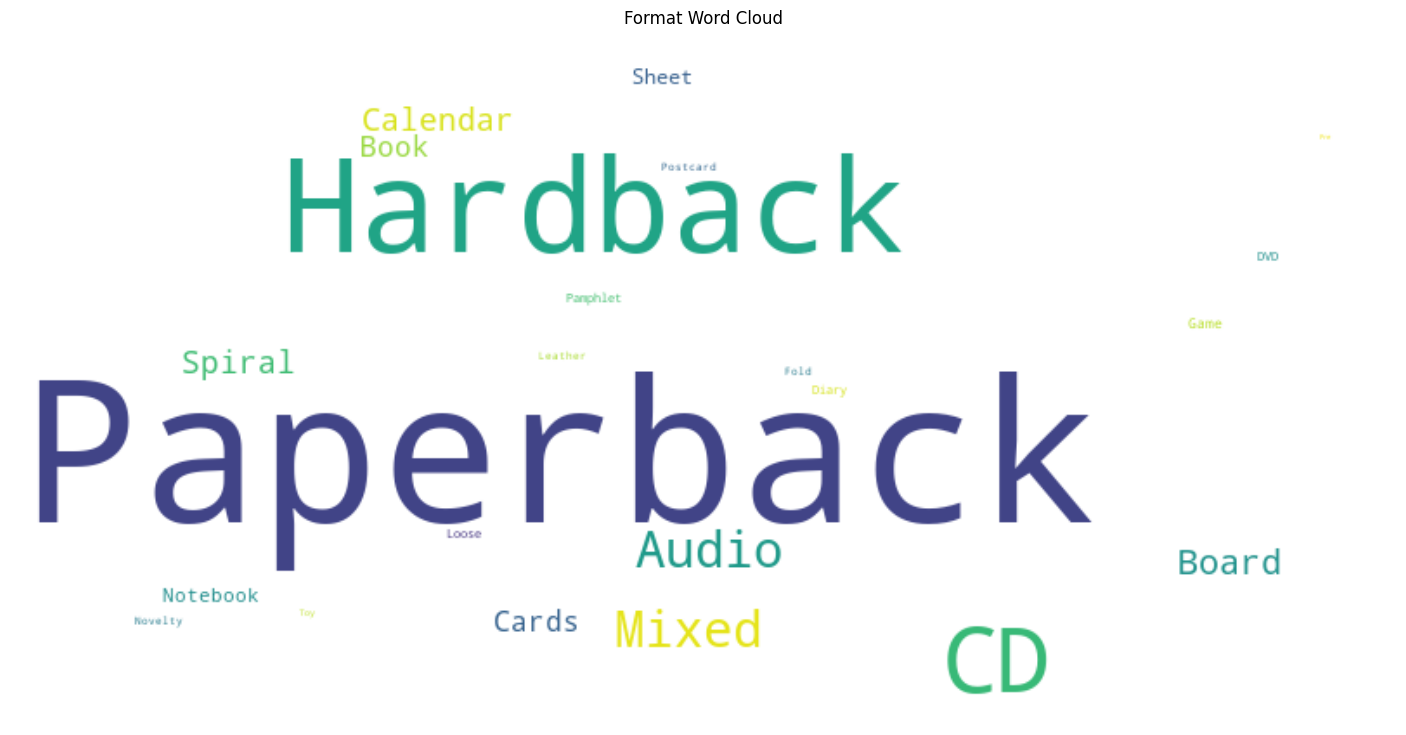

In [15]:

format_cnts = df0['format_name'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(format_cnts)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Format Word Cloud')
plt.show()

Here we can see that some of the significant formats are Hardback , Paperback ,CD , Audio , Calender , Cards and Spiral. 

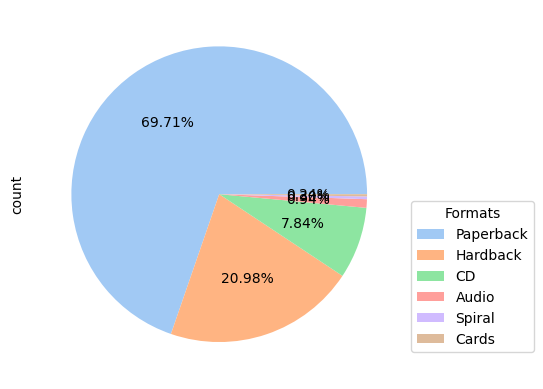

In [16]:
filtered_df = df0.loc[df0['format_name'].isin(['Hardback' , 'Paperback' , 'CD' , 'Audio' , 'Calender' , 'Cards' , 'Spiral'])]
filtered_df = filtered_df[['book_id','dimension-x' , 'dimension-y' , 'dimension-z' , 'weight' , 'format' , 'format_name']]
format_cnts = filtered_df['format_name'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(format_cnts)];
format_cnts.plot(kind = 'pie', colors=piec_colors , labels = None , autopct = '%1.2f%%')
plt.legend(format_cnts.index, title='Formats', loc='best', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()



- We can see over 95% of the data is covered by only three formats which are Paperback , HardBack and CD. So we will consider only these formats

In [17]:
filtered_df = filtered_df.loc[filtered_df['format_name'].isin(['Paperback' , 'Hardback' , 'CD'])]


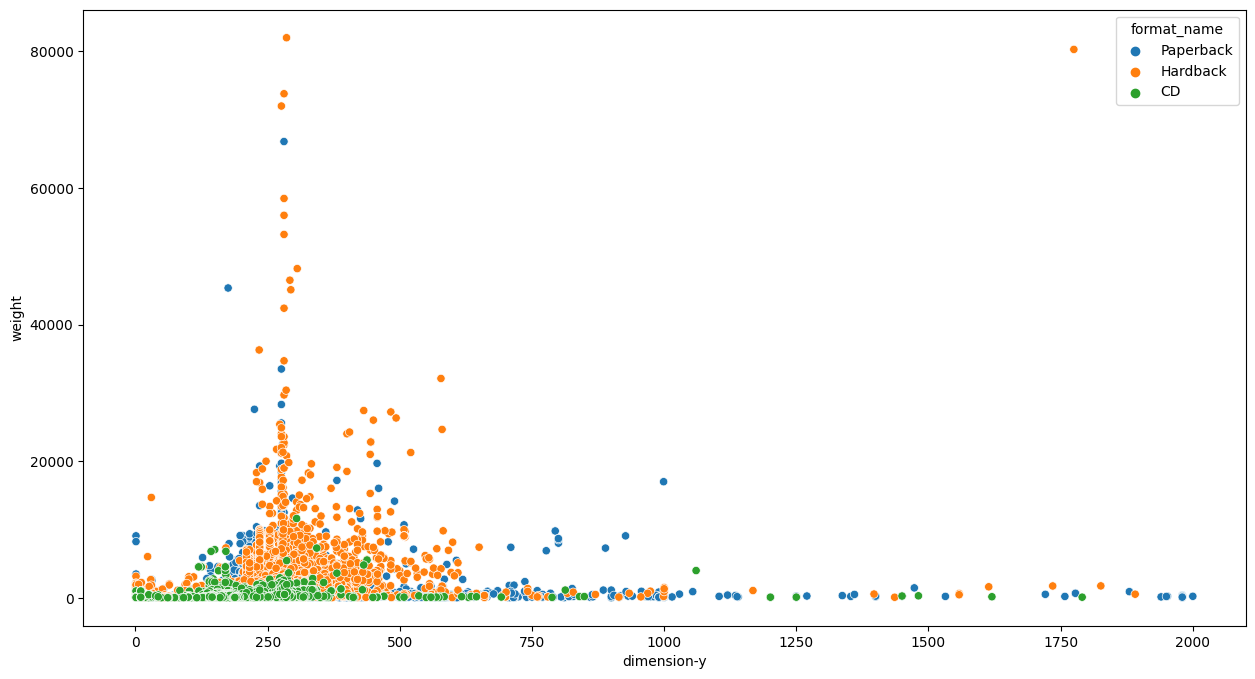

In [18]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=filtered_df["dimension-y"], y=filtered_df["weight"], hue=filtered_df["format_name"],legend="full")

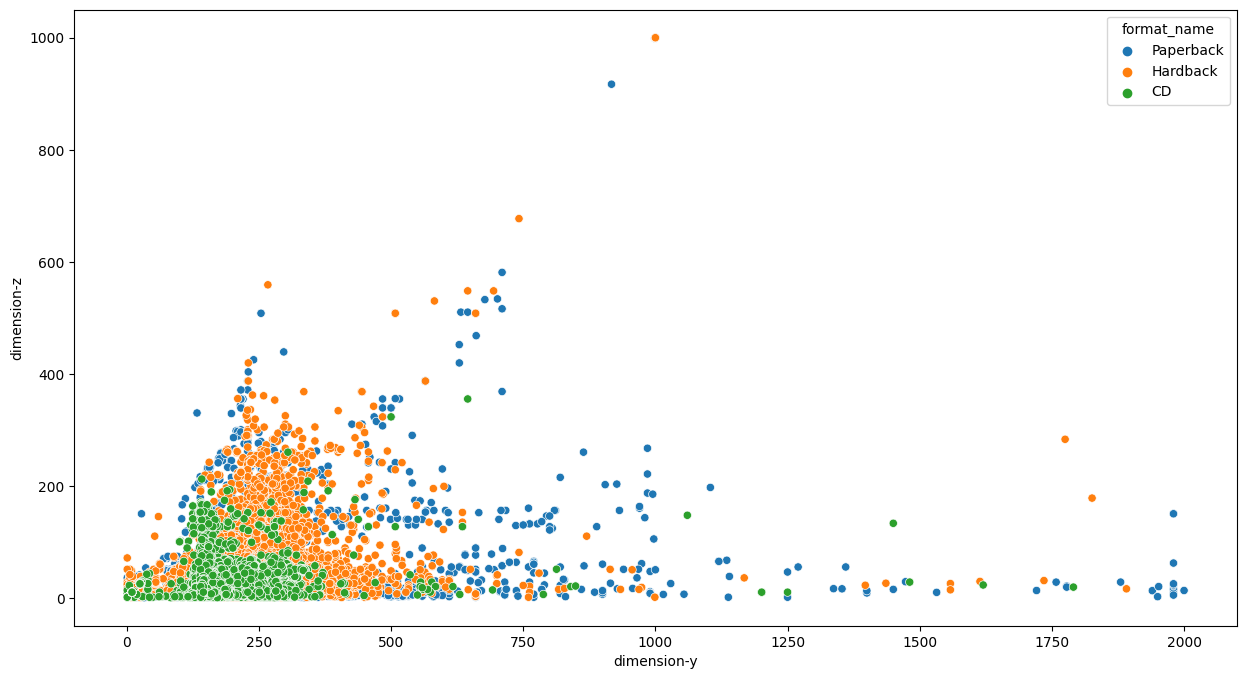

In [19]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=filtered_df["dimension-y"], y=filtered_df["dimension-z"], hue=filtered_df["format_name"],legend="full")

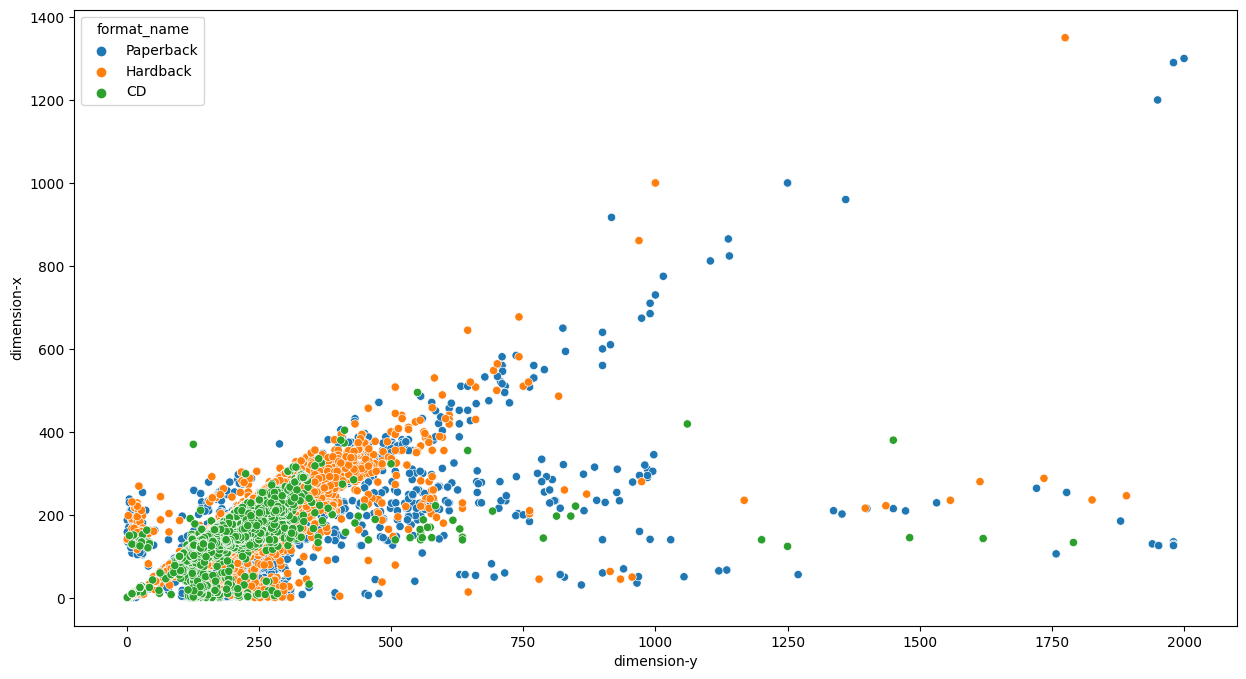

In [20]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=filtered_df["dimension-y"], y=filtered_df["dimension-x"], hue=filtered_df["format_name"],legend="full")

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = filtered_df[['dimension-x', 'dimension-y', 'dimension-z', 'weight']]
y = filtered_df['format']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=100,  
    min_samples_leaf=4,
)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

         1.0       0.91      0.93      0.92    136113
         2.0       0.77      0.70      0.73     40708
         3.0       0.96      0.95      0.95     15221

    accuracy                           0.89    192042
   macro avg       0.88      0.86      0.87    192042
weighted avg       0.88      0.89      0.88    192042



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
clf = LogisticRegression(
    C = 0.01,
    penalty='l2',
    max_iter=500
)  
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

         1.0       0.79      0.95      0.86    136113
         2.0       0.64      0.22      0.33     40708
         3.0       0.81      0.80      0.80     15221

    accuracy                           0.78    192042
   macro avg       0.75      0.66      0.66    192042
weighted avg       0.76      0.78      0.74    192042



In [63]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92    136113
         2.0       0.79      0.63      0.70     40708
         3.0       0.95      0.96      0.96     15221

    accuracy                           0.88    192042
   macro avg       0.88      0.85      0.86    192042
weighted avg       0.88      0.88      0.88    192042

